In [93]:
import torch
import matplotlib.pyplot as plt
import cv2
from torchvision import datasets, transforms

In [179]:
image = cv2.imread('data/00007.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [180]:
image=torch.tensor(image/255., dtype=torch.float32)
image

tensor([[0.0784, 0.0745, 0.0706,  ..., 0.5647, 0.5490, 0.5373],
        [0.0706, 0.0706, 0.0667,  ..., 0.5686, 0.5490, 0.5373],
        [0.0627, 0.0588, 0.0549,  ..., 0.5686, 0.5490, 0.5412],
        ...,
        [0.2000, 0.1725, 0.1608,  ..., 0.9725, 0.9686, 0.9686],
        [0.1647, 0.1765, 0.1451,  ..., 0.9765, 0.9725, 0.9725],
        [0.1686, 0.2078, 0.1647,  ..., 0.9765, 0.9765, 0.9765]])

In [184]:
noise = torch.rand_like(image)
image1 = image + noise
image1

tensor([[0.8415, 1.0547, 0.3693,  ..., 1.4137, 1.1802, 0.9296],
        [0.8347, 0.2435, 0.9459,  ..., 1.5236, 0.9304, 1.0262],
        [0.2945, 0.6454, 0.4916,  ..., 0.8249, 1.4755, 1.1512],
        ...,
        [0.8506, 0.2508, 0.8524,  ..., 1.0198, 1.4967, 0.9932],
        [0.2864, 0.7030, 1.1168,  ..., 1.2336, 1.5922, 1.9227],
        [1.0260, 1.0263, 1.0190,  ..., 1.3577, 1.1093, 1.7994]])

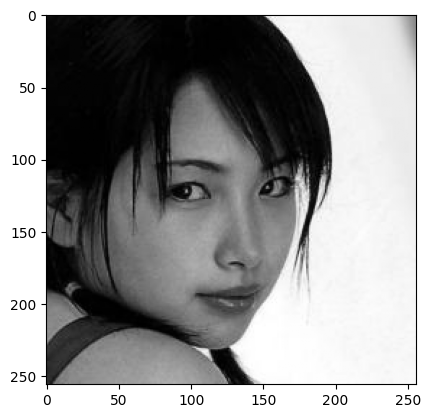

In [185]:
plt.imshow(image, cmap='gray')

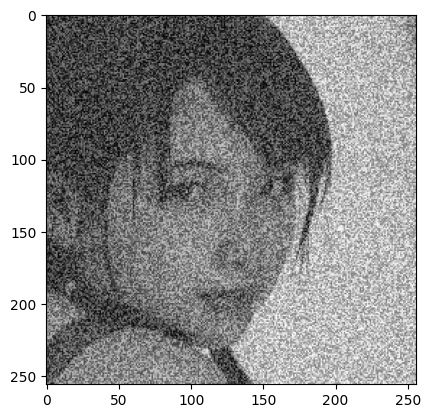

In [186]:
plt.imshow(image1, cmap='gray')

In [111]:
def denoise_image(image, beta_s, beta_e, n_points):
    noise_strength = torch.linspace(beta_s, beta_e, n_points)
    fig, axes = plt.subplots(nrows=1, ncols=n_points, figsize=(50,50))
    
    for ns, ax in zip(noise_strength, axes):
        noise = torch.rand((256, 256, 3)) * ns
        image = image + noise
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"{ns:.4f}")

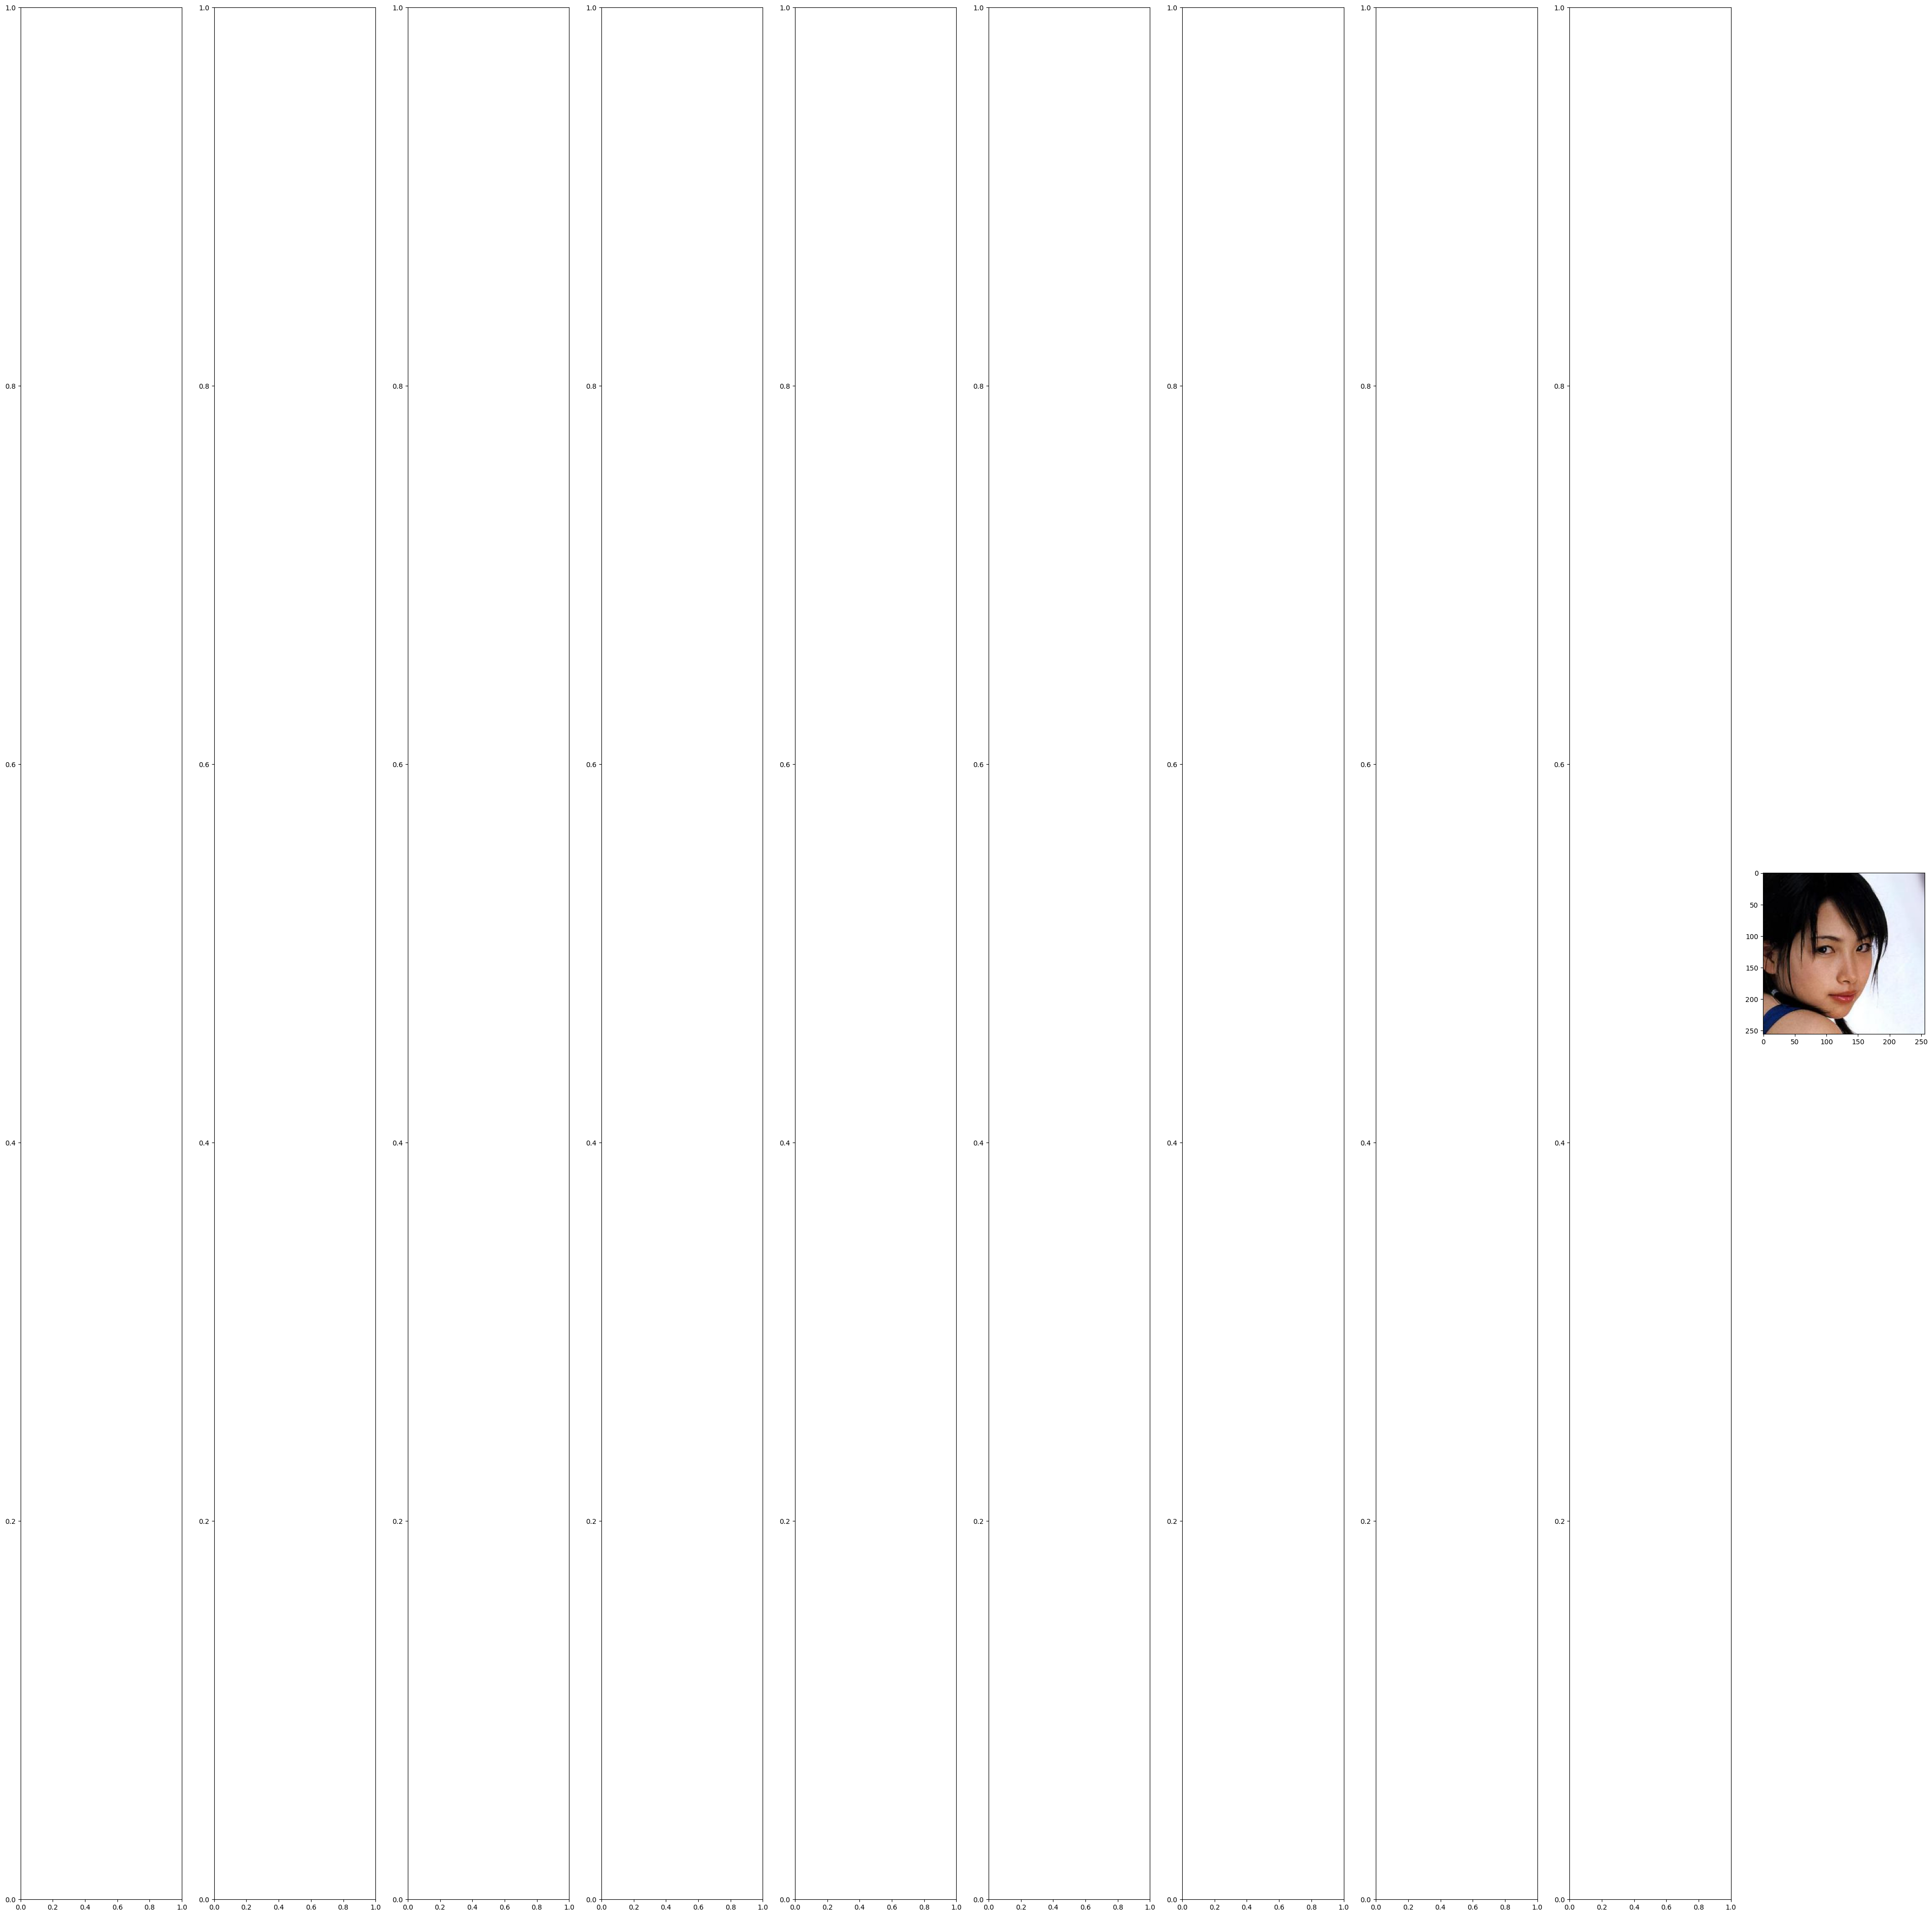

In [112]:
denoise_image(
    image=torch.tensor(image),
    beta_s = 1e-4,
    beta_e = 0.02,
    n_points = 10
)